### web crawling
- 1. requests : json (API 방식, 동적페이지, URL 변경없이 데이터를 수정 및 추가)
- 2. requests : html (정적페이지, URL 변경으로 데이터를 수정 및 추가)
- 3. selenium : web browser(파이썬 객체, 1번과 2번을 사용하지 못할때 사용

### 1. 네이버 주식 데이터 크롤링
- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD환율 데이터 수집
- 그래프 그리기
- 상관계수를 확인

#### 크롤링 절차
- 1. 웹서비스 분석 : URL 분석하기
- 2. request, response 하기 :json 얻기
- 3. 문자열 json 데이터를 dict로 변경(파싱, 형변환) 후 데이터프레임으로 생성

In [1]:
import requests

In [2]:
# 웹 서비스 분석 : url
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code=KOSPI&pageSize=20&page=1"

In [3]:
# 2. request, response : json(str)
respones = requests.get(url) # get 대신 post면 post를 사용하면됨
respones

<Response [200]>

In [4]:
# 3. str 데이터를 dict로 파싱 후 데이터 프레임으로 만들기
datas = respones.json()['result']['siseList'] # jsom 명령어로 딕셔너리로 변경
type(datas), len(datas)

(list, 20)

In [5]:
kospi_df = pd.DataFrame(datas)
kospi_df.tail()

,cd,dt,ncv,cv,cr,ov,hv,lv
15,KOSPI,20200131,2119.01,-28.99,-1.35,2160.60,2167.23,2119.01
16,KOSPI,20200130,2148.00,-37.28,-1.71,2181.54,2187.45,2139.72
17,KOSPI,20200129,2185.28,8.56,0.39,2188.18,2195.45,2172.33
18,KOSPI,20200128,2176.72,-69.41,-3.09,2192.22,2199.93,2166.23
19,KOSPI,20200123,2246.13,-21.12,-0.93,2254.54,2260.63,2241.94


In [6]:
### KOSDAQ 크롤링

In [7]:
# 1. 웹페이지 분석 : URL
url_kosdaq = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSDAQ&pageSize=20&page=1"

In [8]:
# 2. request, response : json
respones_kosdaq = requests.get(url_kosdaq)

In [9]:
# 3. json(str) -> dict -> DataFrame
datas_kosdaq = respones_kosdaq.json()['result']['siseList']

In [10]:
kosdaq_df = pd.DataFrame(datas_kosdaq)
kosdaq_df.tail()

,cd,dt,ncv,cv,cr,ov,hv,lv
15,KOSDAQ,20200131,642.48,-13.91,-2.12,660.98,664.77,641.57
16,KOSDAQ,20200130,656.39,-13.79,-2.06,670.65,673.17,652.42
17,KOSDAQ,20200129,670.18,5.48,0.82,671.08,671.98,664.09
18,KOSDAQ,20200128,664.70,-20.87,-3.04,660.79,668.22,658.78
19,KOSDAQ,20200123,685.57,-2.68,-0.39,685.94,687.71,683.52


In [11]:
### USD 크롤링 (웹페이지 방식 변경으로 하단에 추가내용있음)
url = "https://www.devyohan.io/usd.json"

In [12]:
respones_usd = requests.get(url)

In [13]:
datas_usd = respones_usd.json()['result']['marketIndexDay']

In [14]:
usd_df = pd.DataFrame(datas_usd)
usd_df.tail()

,dt,nv,cv,cr,cbv,csv,sv,rv
15,20191230,1156.5,-4.0,-0.34,1176.73,1136.27,1167.8,1145.2
16,20191227,1160.5,-1.5,-0.13,1180.80,1140.20,1171.8,1149.2
17,20191226,1162.0,-2.0,-0.17,1182.33,1141.67,1173.3,1150.7
18,20191224,1164.0,0.0,0.00,1184.37,1143.63,1175.4,1152.6
19,20191223,1164.0,3.0,0.26,1184.37,1143.63,1175.4,1152.6


In [15]:
len(kosdaq_df), len(kospi_df), len(usd_df)

(20, 20, 20)

In [16]:
# naver.com/robots.txt
# robots은 웹페이지 뒤에 크롤링 관련된 내용을 작성함

#### 시각화

In [17]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [18]:
% config InlineBackend.figure_formats = {'png', 'retina'}

UsageError: Line magic function `%` not found.


In [19]:
usd_df

,dt,nv,cv,cr,cbv,csv,sv,rv
0,20200121,1167.0,6.5,0.56,1187.42,1146.58,1178.4,1155.6
1,20200120,1160.5,1.5,0.13,1180.80,1140.20,1171.8,1149.2
2,20200117,1159.0,-1.5,-0.13,1179.28,1138.72,1170.3,1147.7
3,20200116,1160.5,2.5,0.22,1180.80,1140.20,1171.8,1149.2
4,20200115,1158.0,-0.5,-0.04,1178.26,1137.74,1169.3,1146.7
5,20200114,1158.5,1.5,0.13,1178.77,1138.23,1169.8,1147.2
6,20200113,1157.0,-4.5,-0.39,1177.24,1136.76,1168.3,1145.7
7,20200110,1161.5,1.5,0.13,1181.82,1141.18,1172.8,1150.2
8,20200109,1160.0,-9.0,-0.77,1180.30,1139.70,1171.3,1148.7
9,20200108,1169.0,2.5,0.21,1189.45,1148.55,1180.4,1157.6


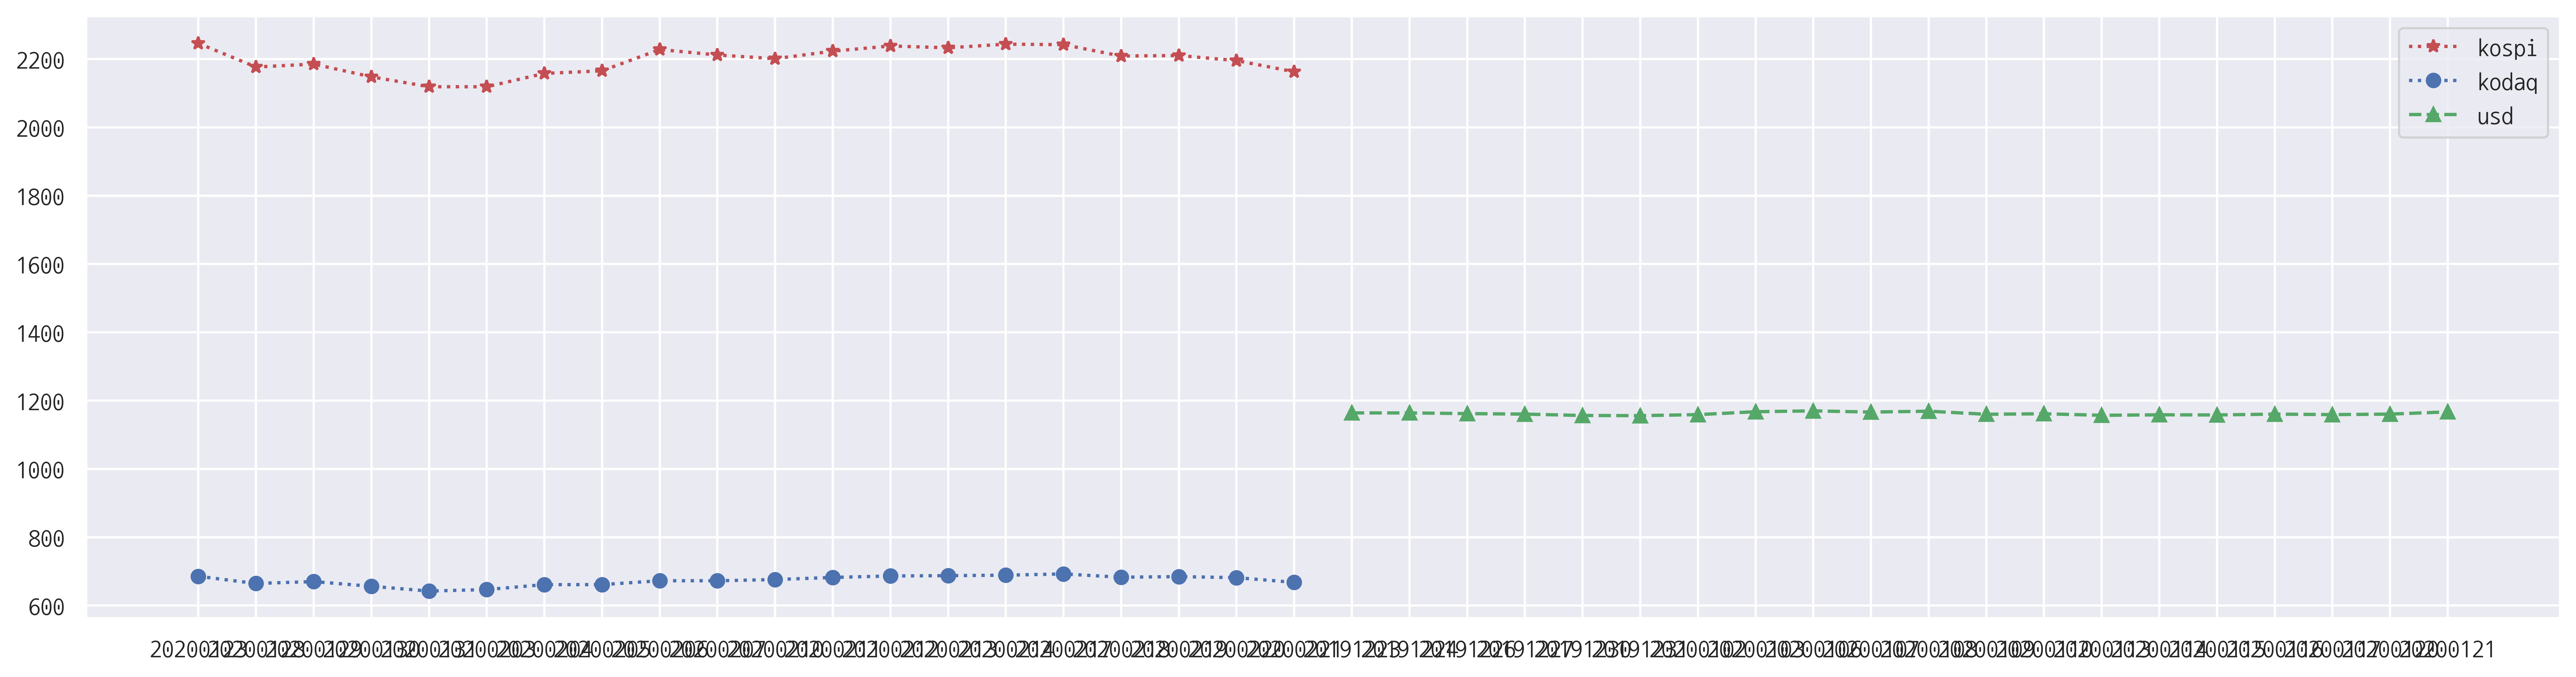

In [20]:
# 코스피 종가 그리기
plt.figure(figsize=(20,5))
plt.plot(kospi_df[::-1]['dt'], kospi_df[::-1]['ncv'], 'r*:', label = 'kospi')
plt.plot(kosdaq_df[::-1]['dt'], kosdaq_df[::-1]['ncv'], 'bo:',label = 'kodaq')
plt.plot(usd_df[::-1]['dt'], usd_df[::-1]['nv'], 'g^--',label = 'usd')
plt.legend(loc = 0)
plt.show()

### 정규화 : Nomalization
- $z = (x - min(x)) / (max(x) - min(x))$

In [21]:
from sklearn import preprocessing

In [22]:
preprocessing.minmax_scale(kosdaq_df[::-1]['ncv'])

array([0.8599082 , 0.44342447, 0.55278388, 0.2775893 , 0.        ,
       0.08720814, 0.37437637, 0.37597286, 0.60287368, 0.60167631,
       0.67032528, 0.79545001, 0.88026342, 0.90061864, 0.92656156,
       1.        , 0.80702455, 0.84414289, 0.78187986, 0.50908002])

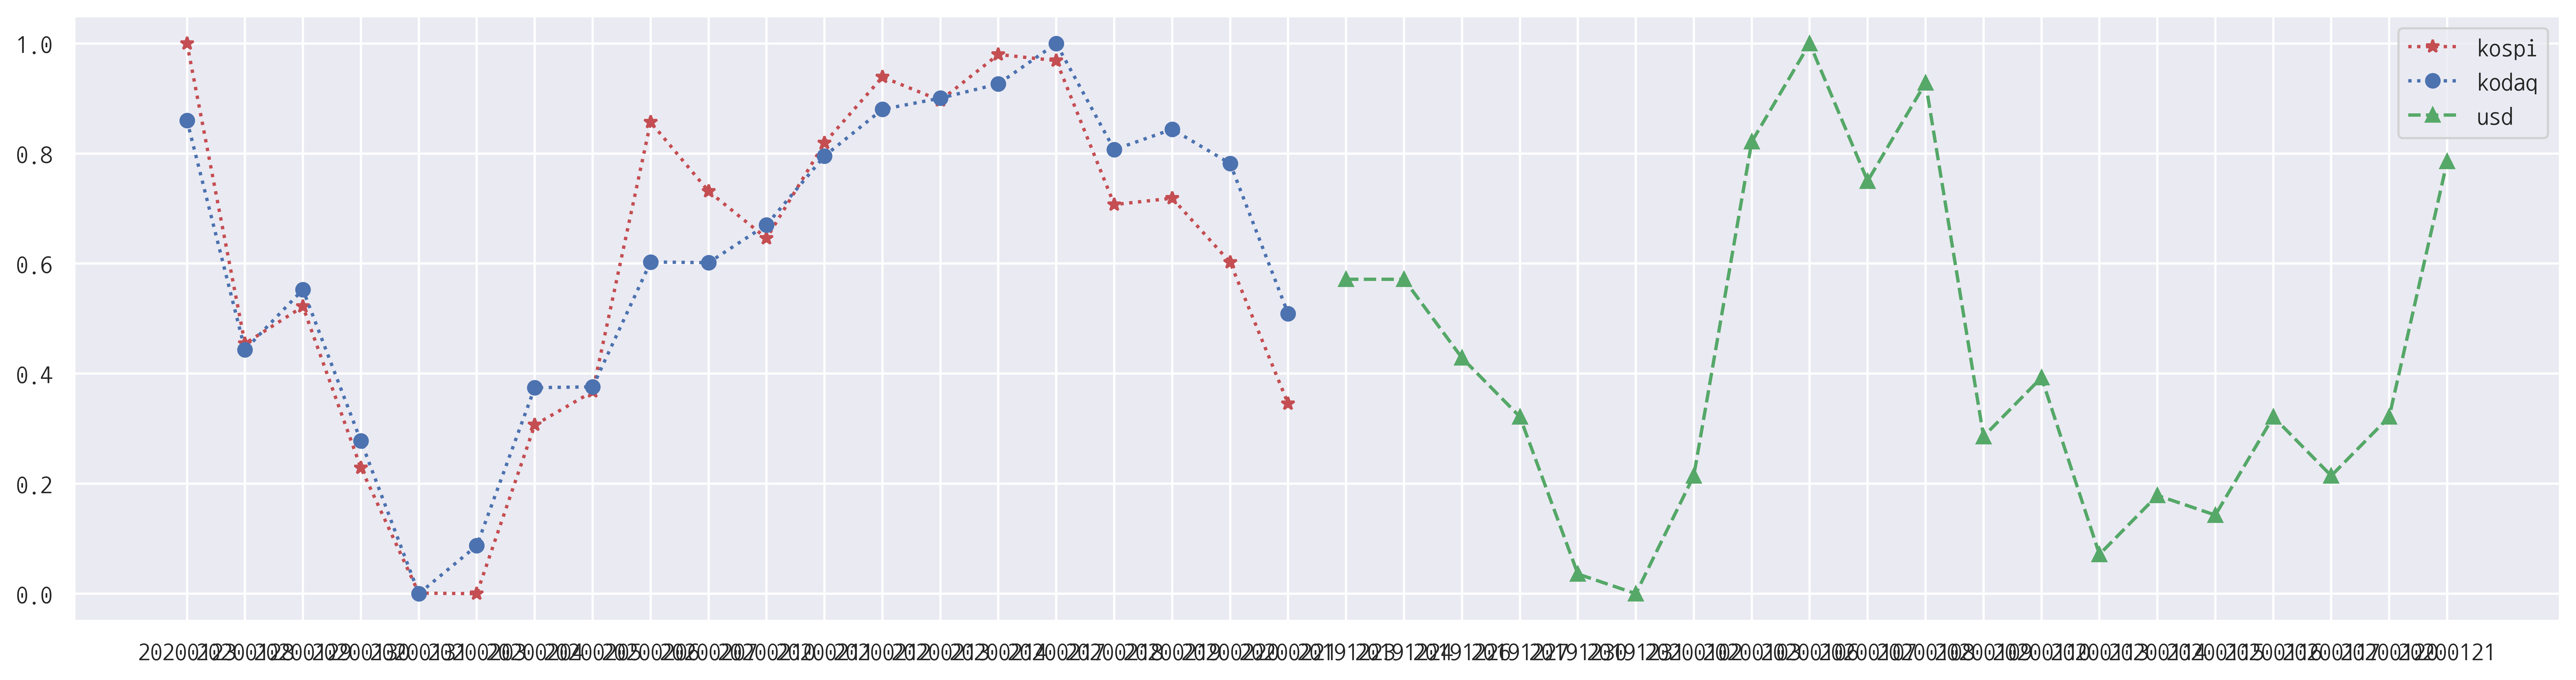

In [23]:
# 정규화하여 코스피 종가 그리기
plt.figure(figsize=(20,5))
plt.plot(kospi_df[::-1]['dt'], preprocessing.minmax_scale(kospi_df[::-1]['ncv']), 'r*:', label = 'kospi')
plt.plot(kosdaq_df[::-1]['dt'], preprocessing.minmax_scale(kosdaq_df[::-1]['ncv']), 'bo:',label = 'kodaq')
plt.plot(usd_df[::-1]['dt'], preprocessing.minmax_scale(usd_df[::-1]['nv']), 'g^--',label = 'usd')
plt.legend(loc = 0)
plt.show()

In [24]:
# 상관계수 구하기

In [25]:
np.corrcoef(kospi_df['ncv'], kosdaq_df['ncv'])[0,1]

0.9443078264856173

In [26]:
np.corrcoef(kospi_df['ncv'], usd_df['nv'])[0,1]

0.15101555824012822

In [27]:
np.corrcoef(kosdaq_df['ncv'], usd_df['nv'])[0,1]

0.023037254858211457

# 200221 박두진강사님 출강내용

In [29]:
import requests

In [30]:
# kosdaq
# 1. 웹서비스 분석 : url 찾기
code, page_size, page = 'KOSPI', 20, 1

url = f'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={code}&pageSize={page_size}&page={page}'

In [31]:
# 2. requests, response : json(str)
response = requests.get(url)
response

<Response [200]>

In [32]:
# 3. json(str) : json(dict) -> DF
datas = response.json()['result']['siseList']
kospi_df = pd.DataFrame(datas)
kospi_df.tail(2)

,cd,dt,ncv,cv,cr,ov,hv,lv
18,KOSPI,20200128,2176.72,-69.41,-3.09,2192.22,2199.93,2166.23
19,KOSPI,20200123,2246.13,-21.12,-0.93,2254.54,2260.63,2241.94


In [33]:
# 함수로 만들기
def get_stock_data(code, page_size = 20, page = 1):

    url = f'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code={code}&pageSize={page_size}&page={page}'
    response = requests.get(url)
    datas = response.json()['result']['siseList']
    return pd.DataFrame(datas)

In [34]:
kosdap_df = get_stock_data('kosdaq',100)
kospi_df = get_stock_data('kospi',100)

In [35]:
# 1. 웹페이지 수집 : URL
code, page_size, page = 'FX_USDKRW',100, 1

url = f'https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd={code}&pageSize={page_size}&page={page}'
print(url)

https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd=FX_USDKRW&pageSize=100&page=1


In [44]:
# 2. requests, response
# 쿠키데이터 추가해서 요청

params = {
    "cookie" : 'NNB=FWZUWB3LZELV4; nx_ssl=2; ASID=dc75479100000170326d84fb00000052; _ga=GA1.2.1313144894.1581473365; NRTK=ag#all_gr#4_ma#-2_si#0_en#0_sp#0; notice_new_account_171101=1; MM_NEW=1; NFS=2; nid_inf=-1250924537; NID_AUT=6alRT+8yuMgVUmmd8s7n1El5/c7Fm7px6BnUTM5PCnoYkjv9sAghdkcCo2rJUaNR; NID_SES=AAABmyAsopA3fbFKtfv7zsiQc2n1hDqtdnHvRpWTG4Btj5RvHMciIFMihCDLYW+7wQoF2y+jAPeJ+I8UImuppjGDe1oUhjRmFCbbtB4iyeKSSfgE/AiYZyTS8IEaD/PMGFU3bFFvxWPHNxmqR4X5mS7vCVrm+3Ya374lMXd2p65dopYmnLL8BauuPMj90z79uz0uDzZEgCG7uj3rxRD2bZ1kppIZTLYiCNXmQ/ywu7nPXbSw8TYyUZT0zmbDBKD2zUrr++xJd3WAtkHCZFejagD9XRqHvTRrHuYN/O1zEo67Uh0oCa10VpH3Jzinftrz0aLjFwk/kf5Vfxif5d1PLJzTjo0WZ89Ehf2iYnZw+tEnR8Ew6p9dlaZb+8QLKKH3uiPgfwJ3ZZlPU2Y6HsrIDqih3i50rVjOK7k4MdPpfOqj6gs9f8ehR+3IvM5bT4tsjSubcdAWtYgylklIiRIVbBg8lmznks9nFEAErAZ246jQWYM18WRkn92yDrtxisT7SfInF0Wo4lp2Lo1GzB7o3BmnQKfrdyDAlD0d8AA8OKymGWlZ; NID_JKL=mbyArnuPjoAXPSu+rgHQsQXEdo1MEsjpQaLJq4+LBtg=; _naver_usersession_=BnF6d3XdSsRWkpYul0k6Aasb; page_uid=UD4FIdp0JywssMqi0fVssssssO0-006612; JSESSIONID=BC522E1047FF107AE68456AB4B8A8BAD; BMR=; XSRF-TOKEN=87a39d58-b3d3-43a0-a6dc-16e4261064d5'
}

response = requests.get(url, headers = params)
response

<Response [200]>

In [45]:
# # 3. json(str) : json(dict) -> DF
datas = response.json()['result']['marketIndexDay']
usd_df = pd.DataFrame(datas)
usd_df

,dt,nv,cv,cr,cbv,csv,sv,rv
0,20200221,1211.5,8.5,0.71,1232.70,1190.30,1223.3,1199.7
1,20200220,1203.0,13.0,1.09,1224.05,1181.95,1214.7,1191.3
2,20200219,1190.0,-0.5,-0.04,1210.82,1169.18,1201.6,1178.4
3,20200218,1190.5,6.5,0.55,1211.33,1169.67,1202.1,1178.9
4,20200217,1184.0,1.0,0.08,1204.72,1163.28,1195.6,1172.4
...,...,...,...,...,...,...,...,...
95,20191004,1197.0,-10.0,-0.83,1217.94,1176.06,1208.7,1185.3
96,20191002,1207.0,5.5,0.46,1228.12,1185.88,1218.8,1195.2
97,20191001,1201.5,2.5,0.21,1222.52,1180.48,1213.2,1189.8
98,20190930,1199.0,-1.0,-0.08,1219.98,1178.02,1210.7,1187.3


In [46]:
# 데이터 합치기

In [47]:
merge_df_1 = pd.merge(kospi_df, kosdap_df, left_on='dt', right_on='dt')
merge_df_1 = merge_df_1.rename(columns={'ncv_x': 'ncv_kospi', 'ncv_y': 'ncv_kosdaq'})
merge_df_1 = merge_df_1[['dt', 'ncv_kospi', 'ncv_kosdaq']]
merge_df_1

,dt,ncv_kospi,ncv_kosdaq
0,20200221,2162.84,667.99
1,20200220,2195.50,681.66
2,20200219,2210.34,684.78
3,20200218,2208.88,682.92
4,20200217,2242.17,692.59
...,...,...,...
95,20191002,2031.91,624.51
96,20191001,2072.42,632.10
97,20190930,2063.05,621.76
98,20190927,2049.93,626.93


In [48]:
merge_df = merge_df_1.merge(usd_df, left_on='dt', right_on='dt')
merge_df

,dt,ncv_kospi,ncv_kosdaq,nv,cv,cr,cbv,csv,sv,rv
0,20200221,2162.84,667.99,1211.5,8.5,0.71,1232.70,1190.30,1223.3,1199.7
1,20200220,2195.50,681.66,1203.0,13.0,1.09,1224.05,1181.95,1214.7,1191.3
2,20200219,2210.34,684.78,1190.0,-0.5,-0.04,1210.82,1169.18,1201.6,1178.4
3,20200218,2208.88,682.92,1190.5,6.5,0.55,1211.33,1169.67,1202.1,1178.9
4,20200217,2242.17,692.59,1184.0,1.0,0.08,1204.72,1163.28,1195.6,1172.4
...,...,...,...,...,...,...,...,...,...,...
94,20191004,2020.69,621.84,1197.0,-10.0,-0.83,1217.94,1176.06,1208.7,1185.3
95,20191002,2031.91,624.51,1207.0,5.5,0.46,1228.12,1185.88,1218.8,1195.2
96,20191001,2072.42,632.10,1201.5,2.5,0.21,1222.52,1180.48,1213.2,1189.8
97,20190930,2063.05,621.76,1199.0,-1.0,-0.08,1219.98,1178.02,1210.7,1187.3


In [49]:
# 그래프 그리기

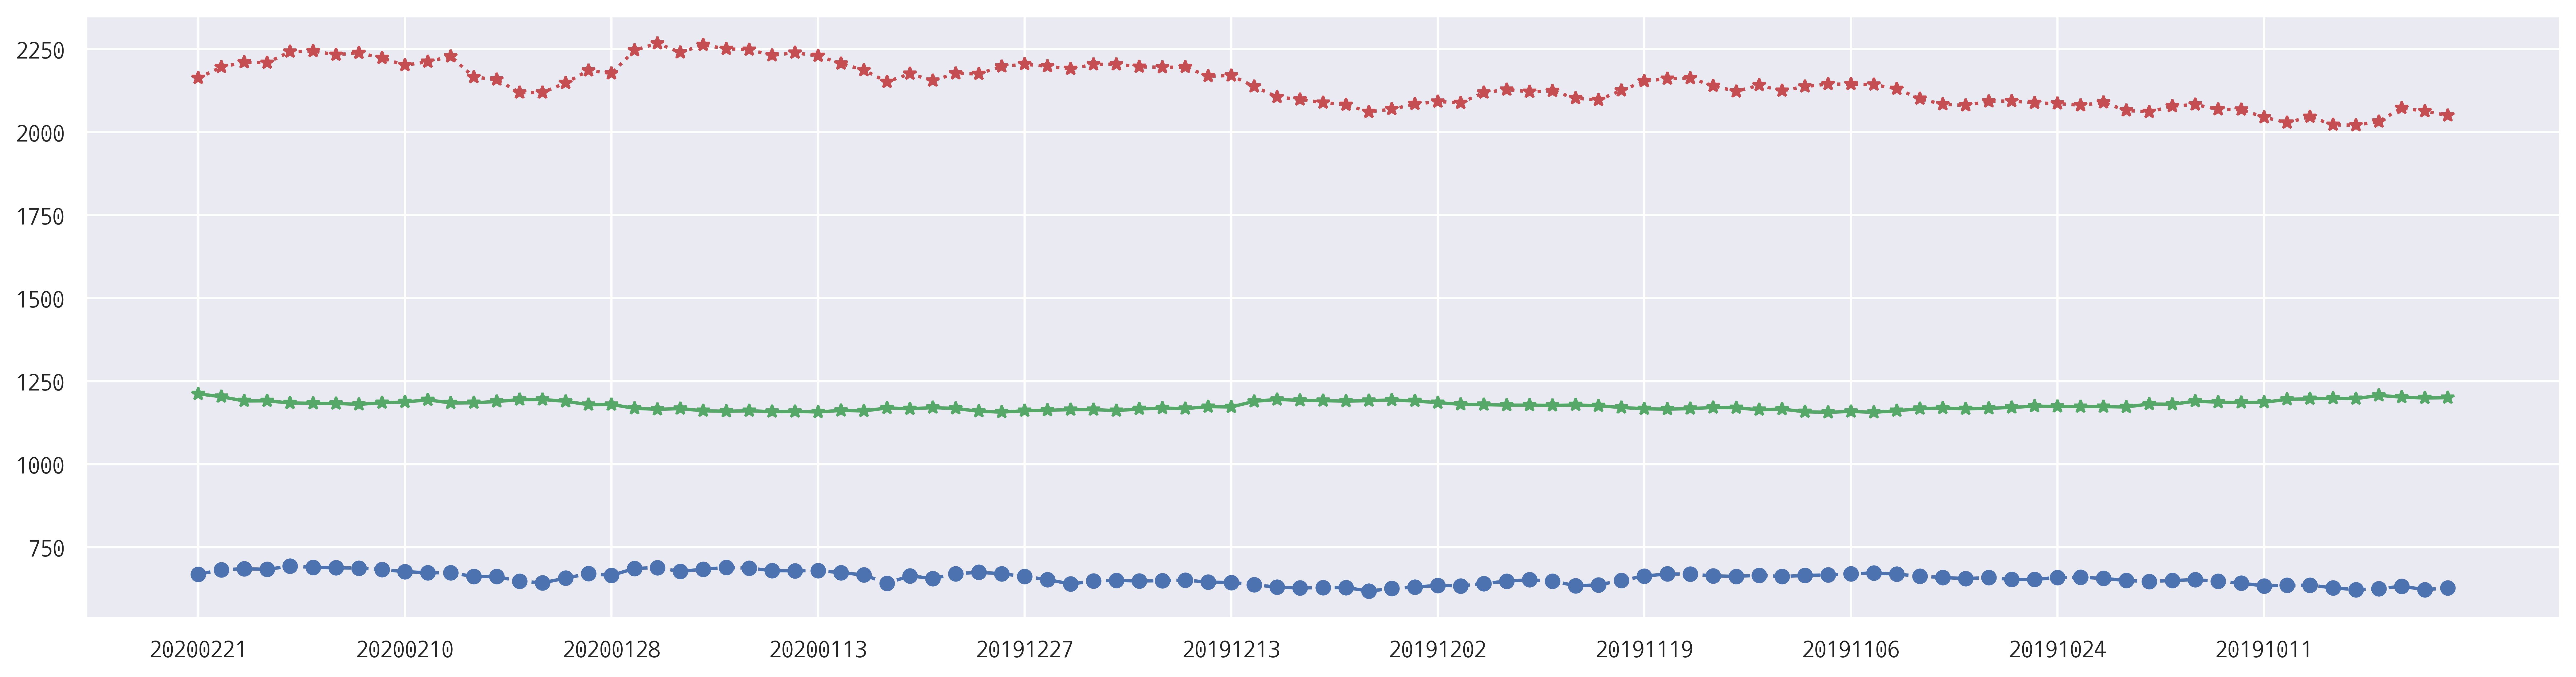

In [50]:
plt.figure(figsize=(20,5))
plt.plot(merge_df['dt'],merge_df['ncv_kospi'],'r*:',label = 'kospi')
plt.plot(merge_df['dt'],merge_df['ncv_kosdaq'],'bo--',label = 'kosdaq')
plt.plot(merge_df['dt'],merge_df['nv'],'g*-',label = 'usd')

# xtick이 항상 10개 출력되도록
step = len(merge_df) // 10
plt.xticks(merge_df[::step]['dt'])

plt.show()

# 정규화
z = (x - min(x)) / (max(x)) - min(x)

In [51]:
from sklearn import preprocessing

In [52]:
preprocessing.maxabs_scale

<function sklearn.preprocessing.data.maxabs_scale(X, axis=0, copy=True)>

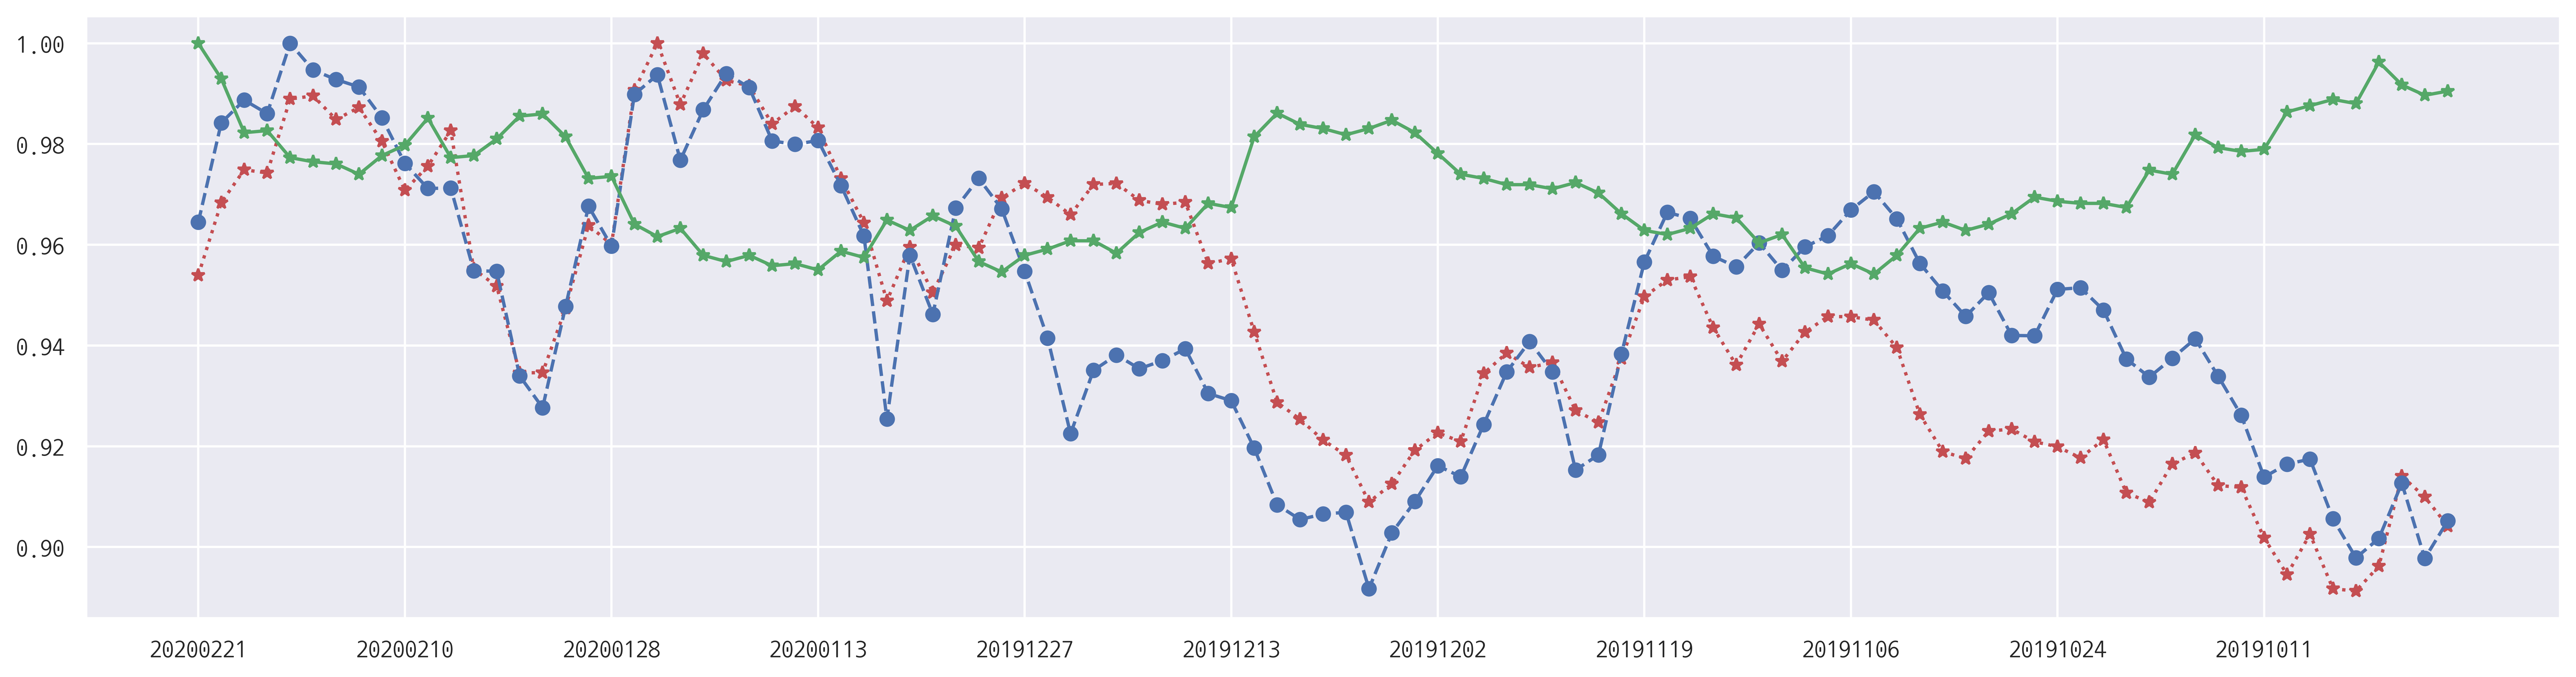

In [53]:
plt.figure(figsize=(20,5))
plt.plot(merge_df['dt'],preprocessing.maxabs_scale(merge_df['ncv_kospi']),'r*:',label = 'kospi')
plt.plot(merge_df['dt'],preprocessing.maxabs_scale(merge_df['ncv_kosdaq']),'bo--',label = 'kosdaq')
plt.plot(merge_df['dt'],preprocessing.maxabs_scale(merge_df['nv']),'g*-',label = 'usd')

# xtick이 항상 10개 출력되도록
step = len(merge_df) // 10
plt.xticks(merge_df[::step]['dt'])

plt.show()

In [54]:
# 상관 계수

In [55]:
np.corrcoef(merge_df['ncv_kosdaq'],merge_df['ncv_kospi'])[0,1]

0.8069640501394441

In [56]:
np.corrcoef(merge_df['ncv_kosdaq'],merge_df['nv'])[0,1]

-0.4643778330181238

In [57]:
np.corrcoef(merge_df['ncv_kospi'],merge_df['nv'])[0,1]

-0.46415066263617705